Perform COR (centre of rotation) correction on centre slices.

In [1]:
import os
import numpy as np
import pickle

In [7]:
from cil.utilities.jupyter import islicer
from cil.utilities.display import show_geometry, show2D
from cil.recon import FDK
from cil.plugins.tigre import FBP, ProjectionOperator
from cil.processors import TransmissionAbsorptionConverter, Slicer, CentreOfRotationCorrector

In [3]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')
file_path = os.path.join(base_dir,'centres/X20.pkl')
with open(file_path, 'rb') as file:
    data_centre = pickle.load(file)

In [4]:
data_centre = TransmissionAbsorptionConverter()(data_centre)

In [5]:
data_centre.min(),data_centre.max()

(-0.017979147, 2.6045916)

FDK recon

Input Data:
	angle: 1571
	horizontal: 1000

Reconstruction Volume:
	horizontal_y: 1000
	horizontal_x: 1000

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



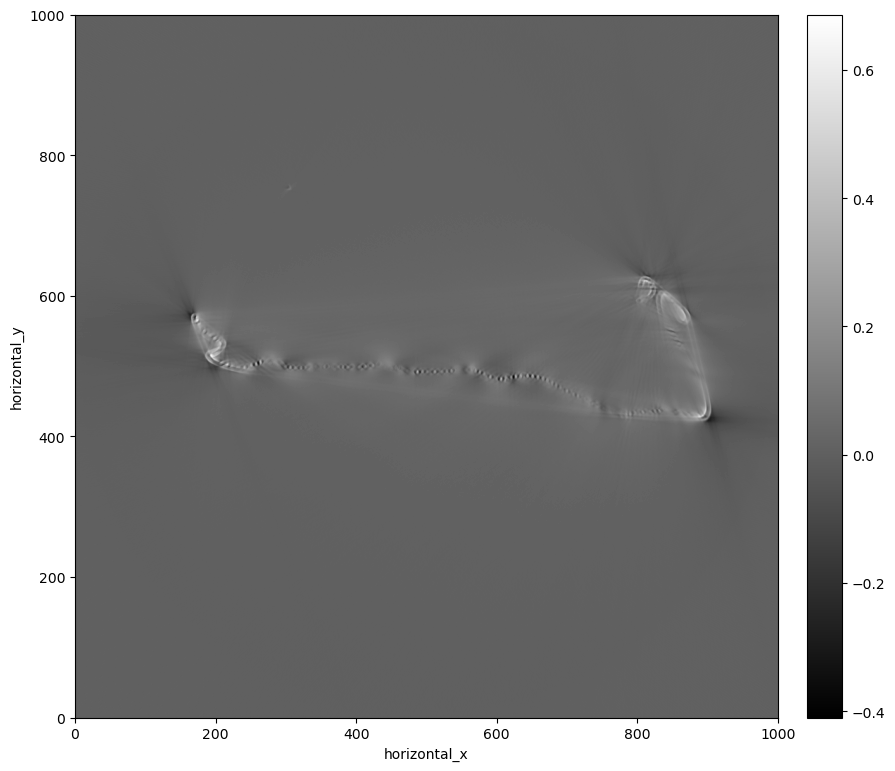

In [6]:
show2D(FDK(data_centre).run())

In [10]:
data_cor = CentreOfRotationCorrector.image_sharpness()(data_centre)

In [12]:
ag = data_cor.geometry

In [18]:
shift = ag.config.system.rotation_axis.position[0]

In [23]:
# ag.config.system.rotation_axis.position[0] = 200
ag.config.system.rotation_axis.position[0] = shift

In [27]:
print(ag.config.system)

2D Cone-beam tomography
System configuration:
	Source position: [   0.        , -255.77484131]
	Rotation axis position: [0.26850416, 0.        ]
	Detector position: [  0.        , 855.97315869]
	Detector direction x: [1., 0.]



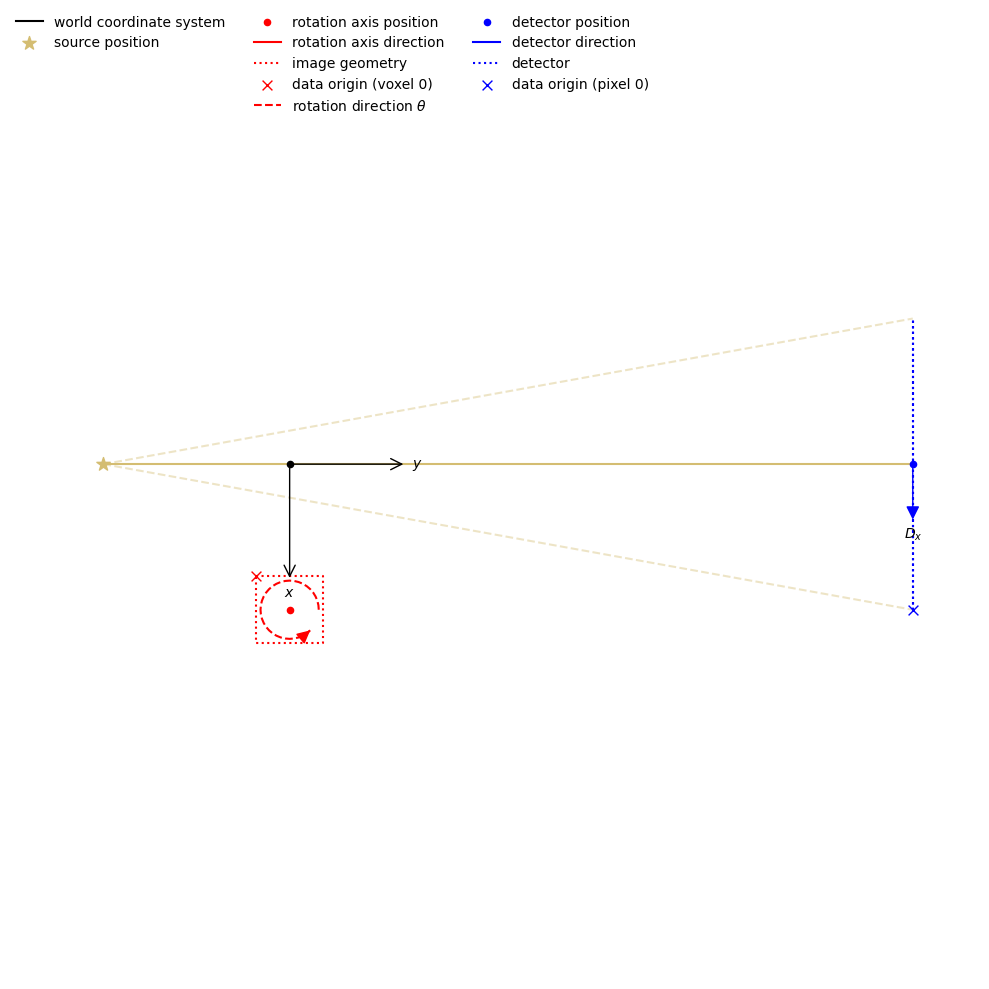

In [20]:
show_geometry(ag)

FDK recon

Input Data:
	angle: 1571
	horizontal: 1000

Reconstruction Volume:
	horizontal_y: 1000
	horizontal_x: 1000

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False

FDK recon

Input Data:
	angle: 1571
	horizontal: 1000

Reconstruction Volume:
	horizontal_y: 1000
	horizontal_x: 1000

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



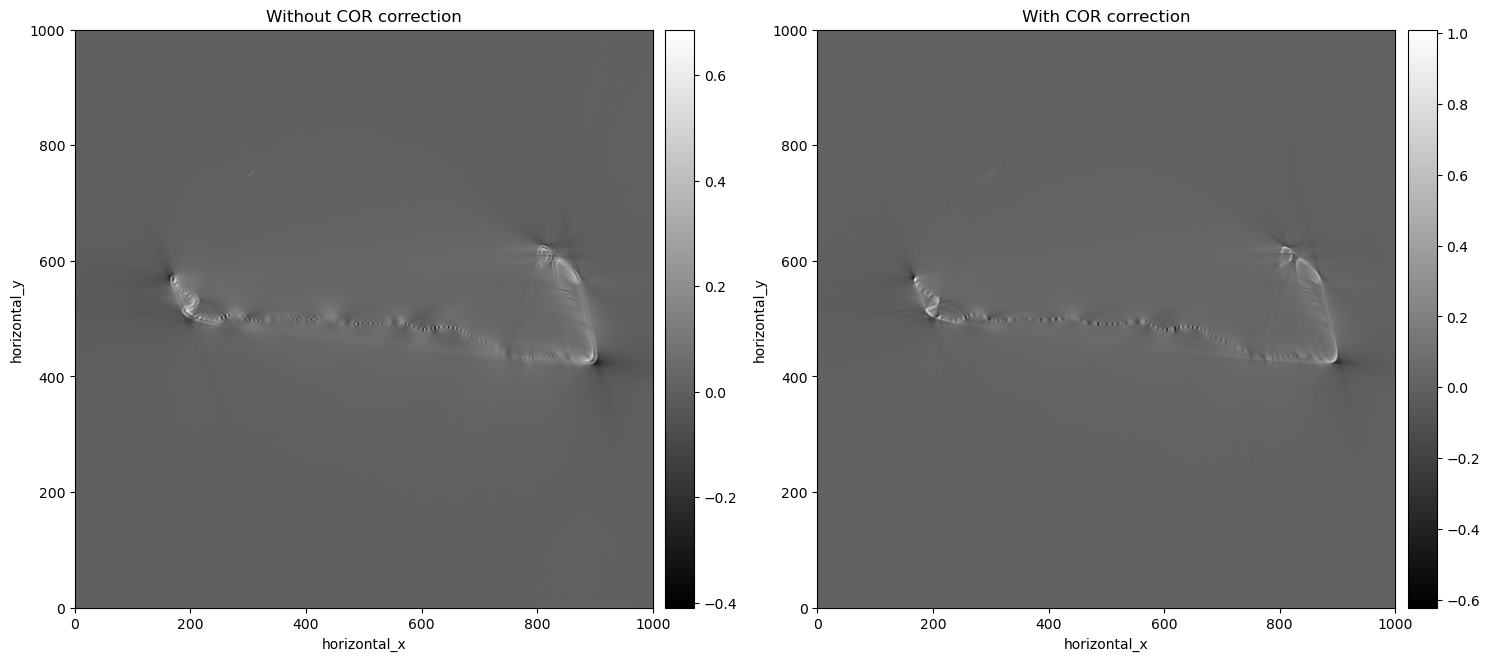

Saved image as /dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/plots/X20_centre_cor.pdf


<Figure size 640x480 with 0 Axes>

In [30]:
show2D([FDK(data_centre).run(),FDK(data_cor).run()], title=['Without COR correction', 'With COR correction'])#.save('plots/X20_centre_cor.pdf')

In [ ]:
# base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')
# file_path = os.path.join(base_dir,'centres/X20_cor.pkl')
# with open(file_path, 'wb') as file:
#     pickle.dump(data_centre, file)